# Distributions

### Uniform Distribution

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#define a function to simulate rolling a dice
def dice():
    number=  [1,2,3,4,5,6]
    return random.choice(number)

series = np.array([dice() for x in range(10000)])
series

array([2, 2, 4, ..., 6, 4, 6])

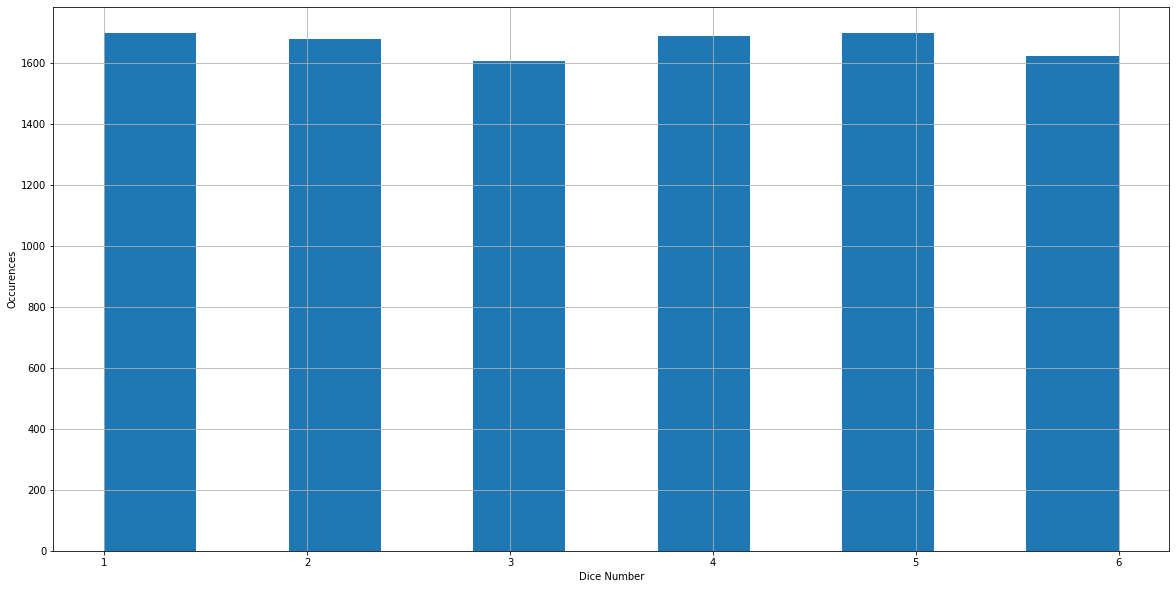

In [2]:
plt.figure(figsize = (20,10))
plt.hist(series,bins = 11,align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

In [3]:
len([x for x in series if x <= 3])/float(len(series))

0.4988

In [4]:
np.mean(series)

3.488

### Binomial Distribution

In [5]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    if a<= 7:
        return 1
    else:
        return 0

In [7]:
res = [trial() for x in range(10)]
sum(res)

4

In [8]:
def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for x in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))
binomial(8)

0.2403

In [9]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
prob_s = pd.Series(prob,index = range(1,11))
prob_s

1     0.0000
2     0.0011
3     0.0090
4     0.0381
5     0.1083
6     0.2068
7     0.2676
8     0.2328
9     0.1203
10    0.0299
dtype: float64

In [12]:
(float(np.math.factorial(10))/(np.math.factorial(7)*np.math.factorial(10-7)))*(0.7**7)*(0.3**3)

0.2668279319999998

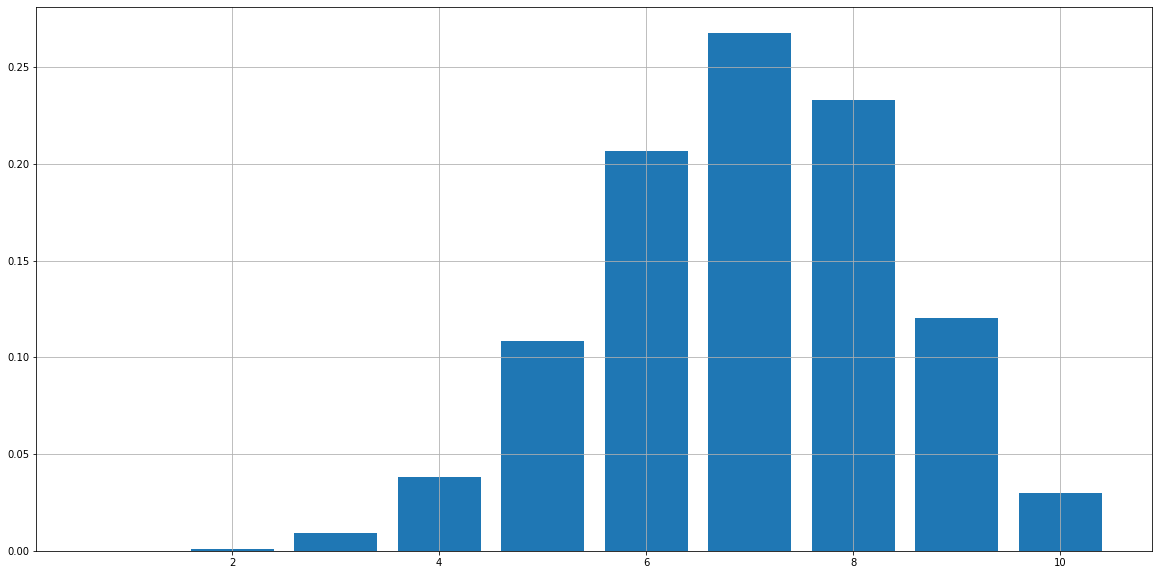

In [13]:
plt.figure(figsize = (20,10))
plt.bar(range(1,11),prob)
plt.grid()
plt.show()

#  Normal Distribution 

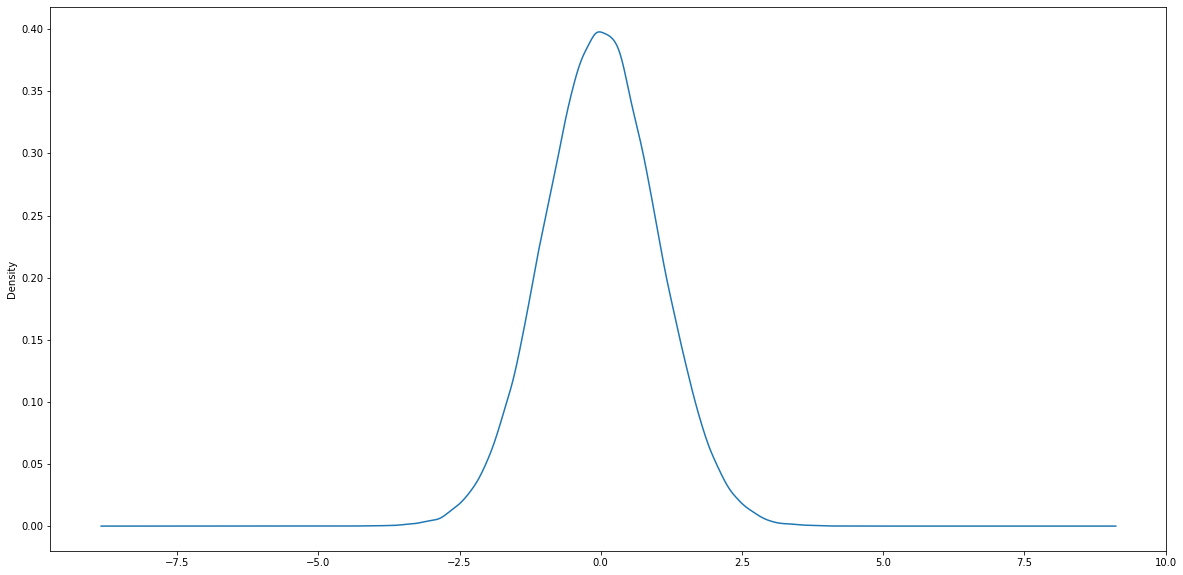

In [22]:
norm = pd.Series(np.random.normal(0,1,100000))
plt.figure(figsize = (20,10))
norm.plot.density()

In [24]:
pip install quandl

In [28]:
import quandl
quandl.ApiConfig.api_key = '513U8EBZf63uYDEfjBB5'
spy_table = quandl.get('WIKI/AAPL')
spy = spy_table.loc['2009':'2012',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

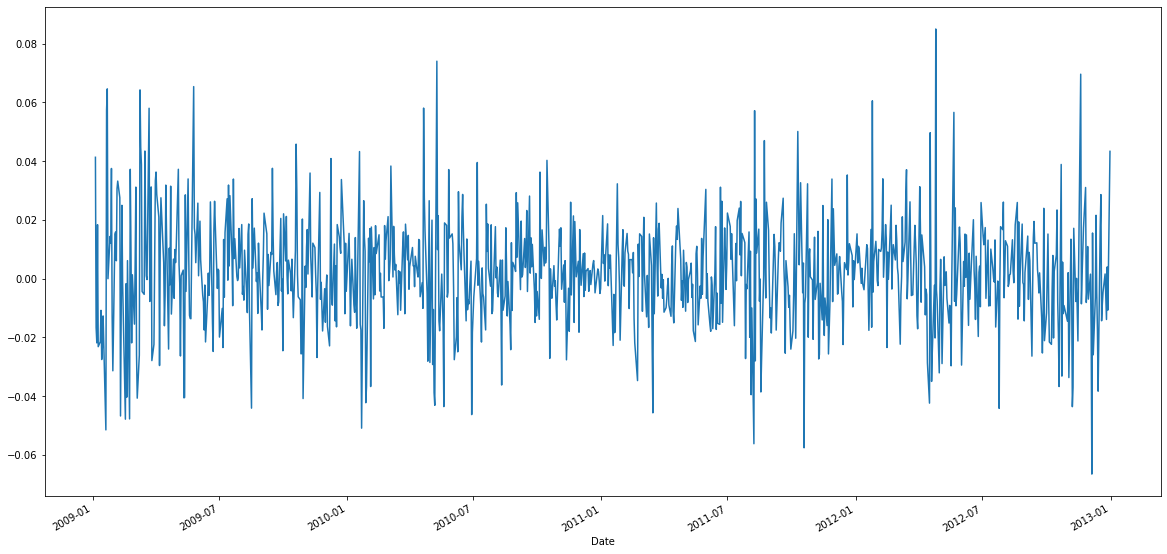

In [29]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

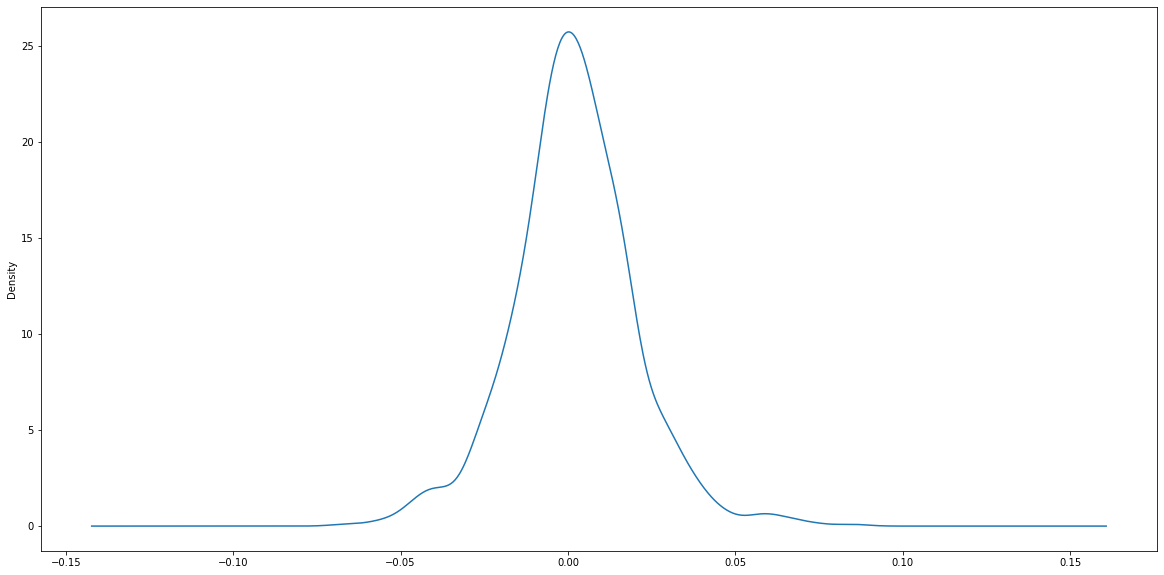

In [30]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

<Figure size 1440x720 with 0 Axes>

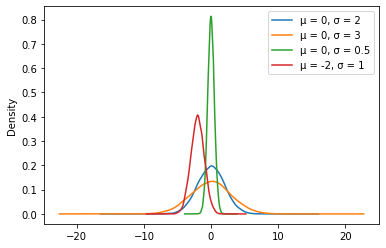

In [31]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()